In [2]:
import os

In [3]:
# Set up the working directory
HOME = os.getcwd()

In [4]:
# Clone the GroundingDINO repository and install dependencies
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 463 (delta 169), reused 143 (delta 129), pack-reused 232 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 16.01 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# Paths for configuration and weights
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
WEIGHTS_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")

# Download Grounding DINO Weights

In [6]:
# Download the weights if not already present
os.makedirs(f"{HOME}/weights", exist_ok=True)
!wget -q -P {HOME}/weights https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

In [7]:
# Download sample images
os.makedirs(f"{HOME}/data", exist_ok=True)
!wget -q -P {HOME}/data https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q -P {HOME}/data https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q -P {HOME}/data https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q -P {HOME}/data https://media.roboflow.com/notebooks/examples/dog-4.jpeg

# Load Grounding DINO Model

In [8]:
# Load the model
from groundingdino.util.inference import load_model, load_image, predict, annotate
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

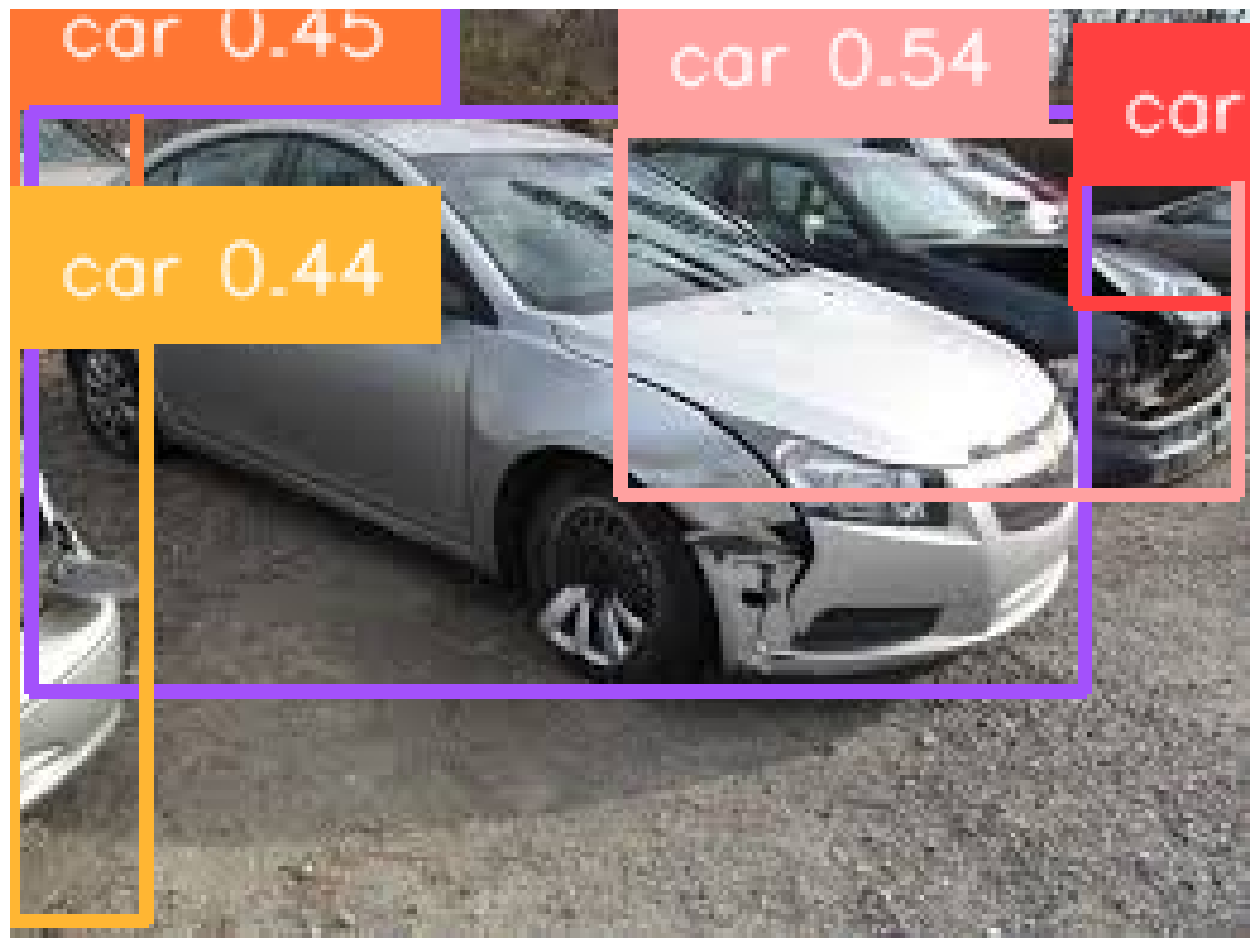

In [10]:
# Perform prediction and annotate the image
IMAGE_PATH = os.path.join(HOME, "data", "0077.JPEG")
TEXT_PROMPT = "car"

image_source, image = load_image(IMAGE_PATH)
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=0.35,
    text_threshold=0.25
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
import supervision as sv
sv.plot_image(annotated_frame, (16, 16))